
# Линейная регрессия. Практическая работа

## Цель практической работы

Научиться строить модель линейной регрессии на реальных данных.

## Что входит в практическую работу


1. Загрузить данные и ознакомиться с ними.
2. Изучить данные и провести анализ.
3. Разделить данные на обучающую и тестовую выборки.
4. Реализовать построение модели с помощью  библиотеки scikit-learn.
5. Получить качество модели с помощью MSE, MAE.


## Что оценивается 

* Выполнены все этапы работы.
* Сделан вывод по результатам.
* Модель не переобучена.
* Получена модель хорошего качества.

## Как отправить работу на проверку

Скачайте файл с заданиями в материалах, откройте его через Jupyter Notebook и выполните задачи. Сохраните изменения при помощи опции Save and Checkpoint из вкладки меню File или кнопки Save and Checkpoint на панели инструментов. Отправьте через форму ниже итоговый файл Jupyter Notebook (в формате .ipynb) или ссылку на него.



## Что нужно сделать

Пусть у нас имеется некоторый набор данных `sales.csv` о продажах квартир:

- **SalePrice** (цена продажи, *зависимая переменная*).
- **GrLivArea** (наземная жилая зона).
- **OverallQuality** (общее качество).
- **GarageArea** (территория гаража).
- **SaleCondition** (условия сделки).

Реализуйте построение модели линейной регрессии на этих данных. Проверьте качество модели на обучающей и тестовой выборках с помощью MAE, MSE. Определите, что вы не переобучились.

### 1. Импорт библиотек

In [1]:
# Ваш код здесь
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import seaborn

C:\Users\A315-23-R7CZ\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
#!pip install pandas

### 2. Загрузка данных

In [3]:
# Ваш код здесь
df = pd.read_csv('sales.csv')
df

,SalePrice,GrLivArea,GarageArea,OverallQual,Street,SaleCondition
0,208500,1710,548,7,Pave,Normal
1,181500,1262,460,6,Pave,Normal
2,223500,1786,608,7,Pave,Normal
3,140000,1717,642,7,Pave,Abnorml
4,250000,2198,836,8,Pave,Normal
...,...,...,...,...,...,...
1455,175000,1647,460,6,Pave,Normal
1456,210000,2073,500,6,Pave,Normal
1457,266500,2340,252,7,Pave,Normal
1458,142125,1078,240,5,Pave,Normal


### 3. Первичный анализ

1. Проведите анализ данных, посмотрите на индивидуальные графики зависимости целевой функции и отдельной переменной. Нередко, если признаков в выборке не так много, удобно построить [sns.pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html).
2. Закодируйте категориальные признаки (например, с помощью [pd.get_dummies](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html)).
3. Подумайте, можно ли здесь создать дополнительные переменные из имеющихся.
4. Сделайте предварительные выводы.

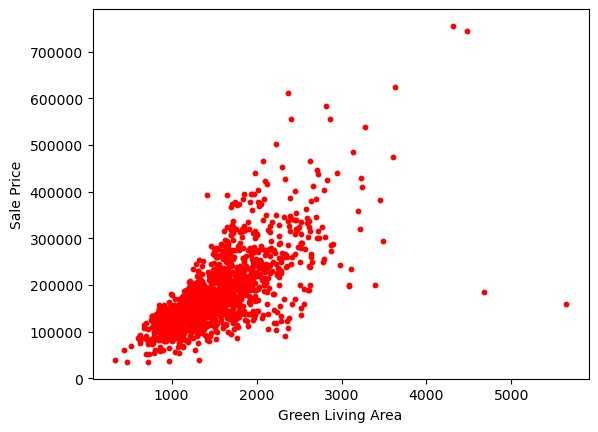

In [4]:
# Ваш код здесь
plt.scatter(df['GrLivArea'], df['SalePrice'], s=10, c='r')
plt.xlabel('Green Living Area')
plt.ylabel('Sale Price')
plt.show()

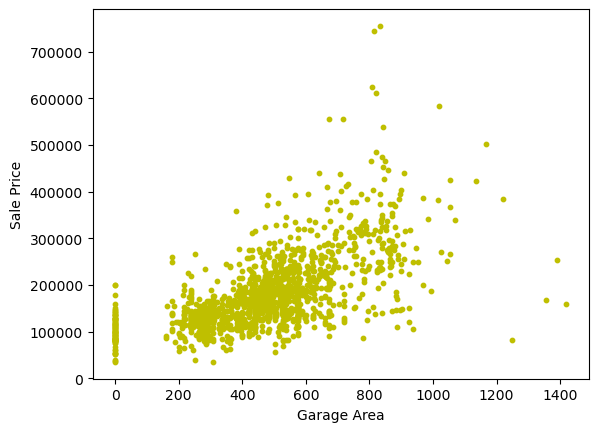

In [5]:
# Ваш код здесь
plt.scatter(df['GarageArea'], df['SalePrice'], s=10, c='y')
plt.xlabel('Garage Area')
plt.ylabel('Sale Price')
plt.show()

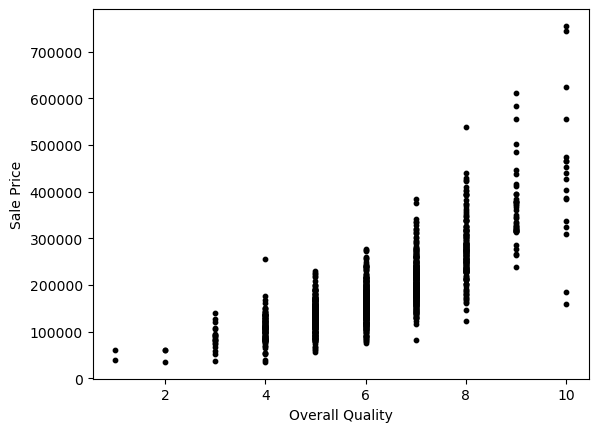

In [6]:
# Ваш код здесь
plt.scatter(df['OverallQual'], df['SalePrice'], s=10, c='black')
plt.xlabel('Overall Quality')
plt.ylabel('Sale Price')
plt.show()

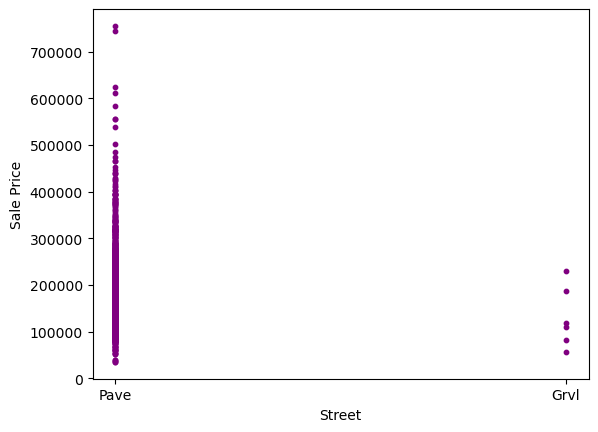

In [7]:
plt.scatter(df['Street'], df['SalePrice'], s=10, c='purple')
plt.xlabel('Street')
plt.ylabel('Sale Price')
plt.show()

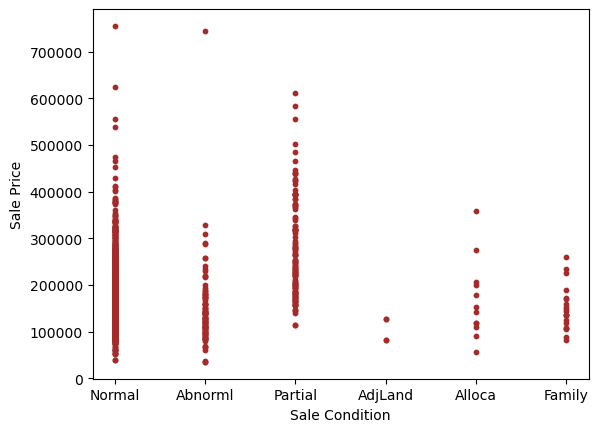

In [8]:
plt.scatter(df['SaleCondition'], df['SalePrice'], s=10, c='brown')
plt.xlabel('Sale Condition')
plt.ylabel('Sale Price')
plt.show()

C:\Users\A315-23-R7CZ\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


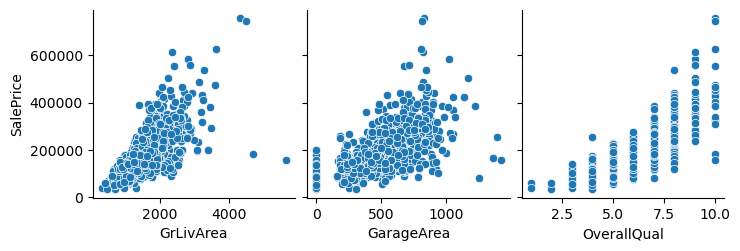

In [9]:
seaborn.pairplot(
    df,
    x_vars = ['GrLivArea', 'GarageArea', 'OverallQual'],
    y_vars = ['SalePrice'],
)

In [10]:
df['OverallQual^2'] = df['OverallQual'].apply(lambda x: x**2)
df

,SalePrice,GrLivArea,GarageArea,OverallQual,Street,SaleCondition,OverallQual^2
0,208500,1710,548,7,Pave,Normal,49
1,181500,1262,460,6,Pave,Normal,36
2,223500,1786,608,7,Pave,Normal,49
3,140000,1717,642,7,Pave,Abnorml,49
4,250000,2198,836,8,Pave,Normal,64
...,...,...,...,...,...,...,...
1455,175000,1647,460,6,Pave,Normal,36
1456,210000,2073,500,6,Pave,Normal,36
1457,266500,2340,252,7,Pave,Normal,49
1458,142125,1078,240,5,Pave,Normal,25


C:\Users\A315-23-R7CZ\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


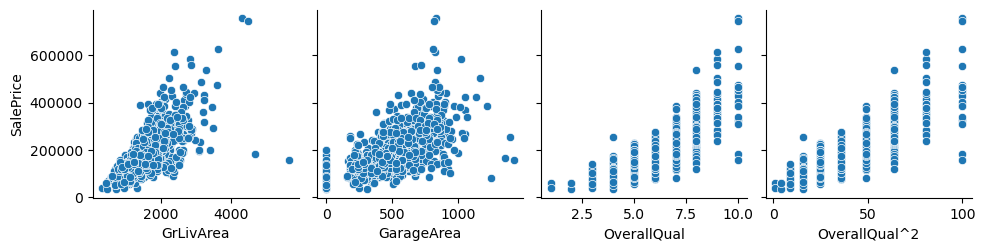

In [11]:
seaborn.pairplot(
    df,
    x_vars = ['GrLivArea', 'GarageArea', 'OverallQual', 'OverallQual^2'],
    y_vars = ['SalePrice'],
)

In [12]:
df1 = pd.DataFrame()
df1 = pd.get_dummies(df['Street'], dtype=float)
df1['SalePrice'] = df['SalePrice']
df1

,Grvl,Pave,SalePrice
0,0.0,1.0,208500
1,0.0,1.0,181500
2,0.0,1.0,223500
3,0.0,1.0,140000
4,0.0,1.0,250000
...,...,...,...
1455,0.0,1.0,175000
1456,0.0,1.0,210000
1457,0.0,1.0,266500
1458,0.0,1.0,142125


In [13]:
df = pd.merge(left = df, right = df1, on = 'SalePrice', how = 'inner')
df.head()

,SalePrice,GrLivArea,GarageArea,OverallQual,Street,SaleCondition,OverallQual^2,Grvl,Pave
0,208500,1710,548,7,Pave,Normal,49,0.0,1.0
1,181500,1262,460,6,Pave,Normal,36,0.0,1.0
2,223500,1786,608,7,Pave,Normal,49,0.0,1.0
3,223500,1786,608,7,Pave,Normal,49,0.0,1.0
4,140000,1717,642,7,Pave,Abnorml,49,0.0,1.0


In [14]:
df2 = pd.DataFrame()
df2 = pd.get_dummies(df['SaleCondition'], dtype=float)
df2['SalePrice'] = df['SalePrice']
df2.head()

,Abnorml,AdjLand,Alloca,Family,Normal,Partial,SalePrice
0,0.0,0.0,0.0,0.0,1.0,0.0,208500
1,0.0,0.0,0.0,0.0,1.0,0.0,181500
2,0.0,0.0,0.0,0.0,1.0,0.0,223500
3,0.0,0.0,0.0,0.0,1.0,0.0,223500
4,1.0,0.0,0.0,0.0,0.0,0.0,140000


In [15]:
df = pd.merge(left = df, right = df2, on = 'SalePrice', how = 'inner')
df.head(-50)

,SalePrice,GrLivArea,GarageArea,OverallQual,Street,SaleCondition,OverallQual^2,Grvl,Pave,Abnorml,AdjLand,Alloca,Family,Normal,Partial
0,208500,1710,548,7,Pave,Normal,49,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,181500,1262,460,6,Pave,Normal,36,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,223500,1786,608,7,Pave,Normal,49,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,223500,1786,608,7,Pave,Normal,49,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,223500,1786,608,7,Pave,Normal,49,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635311,210000,2073,500,6,Pave,Normal,36,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
635312,210000,2073,500,6,Pave,Normal,36,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
635313,210000,2073,500,6,Pave,Normal,36,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
635314,210000,2073,500,6,Pave,Normal,36,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [16]:
df = df.drop(columns = ['Street', 'SaleCondition'])
df.head(-50)

,SalePrice,GrLivArea,GarageArea,OverallQual,OverallQual^2,Grvl,Pave,Abnorml,AdjLand,Alloca,Family,Normal,Partial
0,208500,1710,548,7,49,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,181500,1262,460,6,36,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,223500,1786,608,7,49,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,223500,1786,608,7,49,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,223500,1786,608,7,49,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
635311,210000,2073,500,6,36,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
635312,210000,2073,500,6,36,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
635313,210000,2073,500,6,36,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
635314,210000,2073,500,6,36,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


# Выводы
#### 1) Зависимость цены дома от площади зеленой зоны имеет рассеенный вид. При этом можно выделить некоторую прямую, которая пройдет по середине всех точек и будет представлять собой средневзвешенный вклад в стоимость дома, в зависимости от площади зеленой зоны.
#### 2) Зависимость цены дома от площади гаража также имеет рассеенный вид. И опять же можно через имеющийся набор данных провести некоторую прямую линию, представляющий собой средневзвешенный вклад в стоимость дома, в зависимости от площади гаража.
#### 3) Зависимость стоимости дома от общего его качества явно не носит линейного характера, а напоминает одну из ветвей параболы, поэтому необходимо в исходный датафрейм добавить возведенные в квадрат значения столбца OverallQual. Из построенного графика видно, что квадрат значений от цены дома выпрямился и зависимость стоимости дома от этого параметра может быть описана линейной функцией.

### 4. Разделение на обучающую и тестовую выборки

In [17]:
# Ваш код здесь
train, test = train_test_split(df, train_size=0.7, random_state=123)

### 5. Обучение модели линейной регрессии

Дополнительно можно взглянуть на коэффициенты и смещение обученной модели.

In [18]:
# Ваш код здесь
model = LinearRegression()
model.fit(train[['GrLivArea', 'GarageArea', 'OverallQual', 'OverallQual^2', 'Grvl', 'Pave', 'Abnorml', 
                'AdjLand', 'Alloca', 'Family', 'Normal', 'Partial']], train[['SalePrice']])

LinearRegression()

In [19]:
print('Free coefficient:', model.intercept_)
print('Other coefficients:', model.coef_)

Free coefficient: [25366.33976123]
Other coefficients: [[ 1.68056031e+01  2.56645027e+01  1.47253244e+04 -2.43409214e+02
  -1.26512666e+04  1.26512666e+04 -3.79493860e+03 -1.77147146e+04
   1.97321777e+04 -2.07384607e+02  7.83497070e+02  1.20136313e+03]]


### 6. Получение предсказаний для обучающей и тестовой выборок

In [20]:
# Ваш код здесь
SalePrice_predict_train = model.predict(train[['GrLivArea', 'GarageArea', 'OverallQual', 'OverallQual^2', 'Grvl', 'Pave', 
                                               'Abnorml', 'AdjLand', 'Alloca', 'Family', 'Normal', 'Partial']])
print(SalePrice_predict_train[:, 0][:10])

[147336.65214963 160969.13596267 138993.69894496 135233.60532081
 141906.47790596 157103.90671039 141882.50682611 140947.61634448
 189088.05746831 147158.81207429]


In [21]:
SalePrice_predict_test = model.predict(test[['GrLivArea', 'GarageArea', 'OverallQual', 'OverallQual^2', 'Grvl', 'Pave', 
                                             'Abnorml', 'AdjLand', 'Alloca', 'Family', 'Normal', 'Partial']])
print(SalePrice_predict_test[:, 0][:10])

[113840.13241806 165718.22718284 162341.09423722 136592.58054607
 149479.57662101 151245.46321493 162233.87115407 136455.04714068
 138575.8328831  143420.5605554 ]


### 7. Проверка предсказаний

1. Проверьте качество модели на обучающей и тестовой выборках с помощью MAE, MSE.
2. Постройте диаграмму рассеяния целевой и предсказанной переменных. 

In [22]:
# Ваш код здесь
train_mse = mean_squared_error(train[['SalePrice']], SalePrice_predict_train)
test_mse = mean_squared_error(test[['SalePrice']], SalePrice_predict_test)
print("Train MSE: {}".format(train_mse))
print("Test MSE: {}".format(test_mse))

Train MSE: 506078400.6158752
Test MSE: 507048643.98544353


In [23]:
train_mae = mean_absolute_error(train[['SalePrice']], SalePrice_predict_train)
test_mae = mean_absolute_error(test[['SalePrice']], SalePrice_predict_test)
print("Train MAE: {}".format(train_mae))
print("Test MAE: {}".format(test_mae))

Train MAE: 15754.237511321106
Test MAE: 15748.063323031112
